# Summary
1. No Transaction on Saturday
2. November 2011 is the Highest Sales
3. December 2011 look suspicious, Usualy the highest sales accure in December (Dataset only until 2011-12-09)
4. Day 1 to 8 is the busiest day, after that sale start to decline 
5. Sales tend to increase from Monday to Thuesday, and decrease 
6. Majority of sale accure at 10:00 to 15:00, peak at 12:00

Most transaction accure during work hours (Heheh)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

%matplotlib inline
color = sns.color_palette()



In [13]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("sales_data.csv")
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566309 entries, 0 to 566308
Data columns (total 17 columns):
Unnamed: 0          566309 non-null int64
InvoiceNo           566309 non-null object
StockCode           566309 non-null object
Quantity Shipped    566309 non-null float64
 Year               566309 non-null object
Invoice Date        566076 non-null datetime64[ns]
UnitPrice           566309 non-null float64
 Ext-Price          566309 non-null object
CustomerID          566309 non-null int64
Country             566309 non-null object
GM%                 566309 non-null object
Shipper             566309 non-null object
COST                566309 non-null float64
EXT COST            566309 non-null float64
REGION              566309 non-null object
SALES P             566309 non-null object
OrderPeriod         566309 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(10)
memory usage: 73.5+ MB


In [14]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P,OrderPeriod
0,0,568200,PADS,5.00,"2,017",2017-09-25,1.0,$5.00,16198,United Kingdom,0%,Delivery Truck,1.0,4.999763,SOUTH,GRACE J,2017-09
1,1,568375,BANK CHARGES,5.00,"2,017",2017-09-26,1.0,$5.00,13405,United Kingdom,100%,UPS Next day Air,0.0,0.000000,WEST,JEFF Y,2017-09
2,2,561226,PADS,5.00,"2,017",2017-07-26,1.0,$5.00,15618,United Kingdom,0%,Delivery Truck,1.0,4.999763,SOUTH,GRACE J,2017-07
3,3,2550193,PADS,7.08,"2,018",2018-06-08,1.0,$7.08,13952,United Kingdom,0%,UPS ground 2nd day,1.0,7.079664,CENTRAL,PETER T,2018-06
4,4,550193,PADS,5.00,"2,017",2017-04-15,1.0,$5.00,13952,United Kingdom,0%,UPS ground 2nd day,1.0,4.999763,CENTRAL,PETER T,2017-04


In [15]:
# Item sale with Quantity <=0 or unitPrice < 0
print (((df['Quantity Shipped'] <= 0) | (df['UnitPrice'] < 0)).value_counts())

#Delete the negative values 
df = df.loc[(df['Quantity Shipped'] > 0) | (df['UnitPrice'] >= 0)]

False    566309
dtype: int64


In [16]:
df = df[pd.notnull(df['Invoice Date'])]

In [18]:
%%timeit
df['yearmonth'] = df['Invoice Date'].apply(lambda x: (100*x.year) + x.month)
df['Week'] = df['Invoice Date'].apply(lambda x: x.strftime('%W'))
df['day'] = df['Invoice Date'].apply(lambda x: x.strftime('%d'))
df['Weekday'] = df['Invoice Date'].apply(lambda x: x.strftime('%w'))


1 loop, best of 3: 13.2 s per loop


In [22]:
#df = df.iloc[:,1:-1]

In [64]:
df

,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,...,COST,EXT COST,REGION,SALES P,OrderPeriod,yearmonth,Week,day,Weekday,month
0,568200,PADS,5.00000,"2,017",2017-09-25,1.000,$5.00,16198,United Kingdom,0%,...,1.00,4.999763,SOUTH,GRACE J,2017-09,201709,39,25,1,"Sep,17"
1,568375,BANK CHARGES,5.00000,"2,017",2017-09-26,1.000,$5.00,13405,United Kingdom,100%,...,0.00,0.000000,WEST,JEFF Y,2017-09,201709,39,26,2,"Sep,17"
2,561226,PADS,5.00000,"2,017",2017-07-26,1.000,$5.00,15618,United Kingdom,0%,...,1.00,4.999763,SOUTH,GRACE J,2017-07,201707,30,26,3,"Jul,17"
3,2550193,PADS,7.08000,"2,018",2018-06-08,1.000,$7.08,13952,United Kingdom,0%,...,1.00,7.079664,CENTRAL,PETER T,2018-06,201806,23,08,5,"Jun,18"
4,550193,PADS,5.00000,"2,017",2017-04-15,1.000,$5.00,13952,United Kingdom,0%,...,1.00,4.999763,CENTRAL,PETER T,2017-04,201704,15,15,6,"Apr,17"
5,561047,16045,1.07500,"2,017",2017-07-24,1.004,$1.08,16948,United Kingdom,0%,...,1.01,1.080605,WEST,JEFF Y,2017-07,201707,30,24,1,"Jul,17"
6,560259,16045,6.45000,"2,017",2017-07-17,1.007,$6.50,13654,United Kingdom,0%,...,1.01,6.483628,CENTRAL,GAIL H,2017-07,201707,29,17,1,"Jul,17"
7,2558389,16045,46.95600,"2,018",2018-07-09,1.001,$47.00,14383,United Kingdom,0%,...,1.01,47.200809,SOUTH,GRACE J,2018-07,201807,28,09,1,"Jul,18"
8,558389,16045,3.22500,"2,017",2017-06-29,1.012,$3.26,14383,United Kingdom,1%,...,1.01,3.241814,SOUTH,GRACE J,2017-06,201706,26,29,4,"Jun,17"
9,C536757,84347,2.00000,"2,016",2016-12-02,1.003,$2.01,15838,United Kingdom,24%,...,0.76,1.522598,NORTH,JOHN A,2016-12,201612,48,02,5,"Dec,16"


In [63]:
df['month'] = df['Invoice Date'].dt.strftime('%b,%y')

## Number of Invoice
### Number Invoice group by Month

In [81]:
df1 = df.groupby(['yearmonth']).agg(['count','nunique'])['InvoiceNo']

In [82]:
df1.columns=['Invoice_count','Unique_Invoices']

In [83]:
df1

,Invoice_count,Unique_Invoices
yearmonth,,
201612,28723,1434
201701,21943,984
201702,20975,1008
201703,26658,1227
201704,21444,1151
201705,28269,1488
201706,25436,1264
201707,31391,1382
201708,26803,1171


In [67]:
df1=df1.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

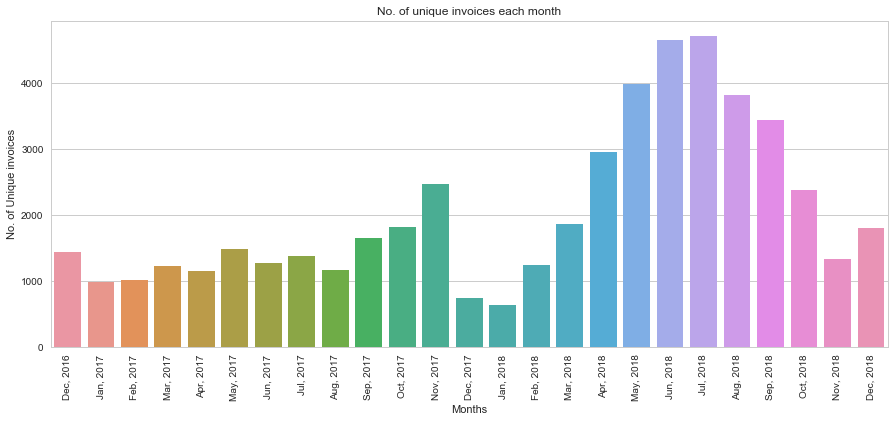

In [76]:
import seaborn as sns
sns.set(style="whitegrid")
df1['month'] = pd.to_datetime(df1['yearmonth'], format='%Y%m', errors='ignore')


plt.figure(figsize=(15,6))
ax = sns.barplot(x="month", y="Unique_Invoices", data=df1)
ax.set_xticklabels(df1['month'].dt.strftime('%b, %Y'))
plt.ylabel("No. of Unique invoices")
plt.xlabel("Months")
plt.title("No. of unique invoices each month")
plt.xticks(rotation=90)

In [75]:
# 2018-12 Dataset end at
df.loc[df['yearmonth'] == 201812]['Invoice Date'].max()

Timestamp('2018-12-27 00:00:00')

### Number Invoice group by Week

In [77]:
df1 = df.groupby(['Week']).agg(['count','nunique'])['InvoiceNo']

In [80]:
df1

,Week,Invoice_count,Unique_Invoices
0,01,4507,216
1,02,5967,415
2,03,4542,478
3,04,7136,715
4,05,7942,858
5,06,4469,837
6,07,7524,995
7,08,6749,974
8,09,6269,920
9,10,8682,1077


In [78]:
df1.columns=['Invoice_count','Unique_Invoices']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

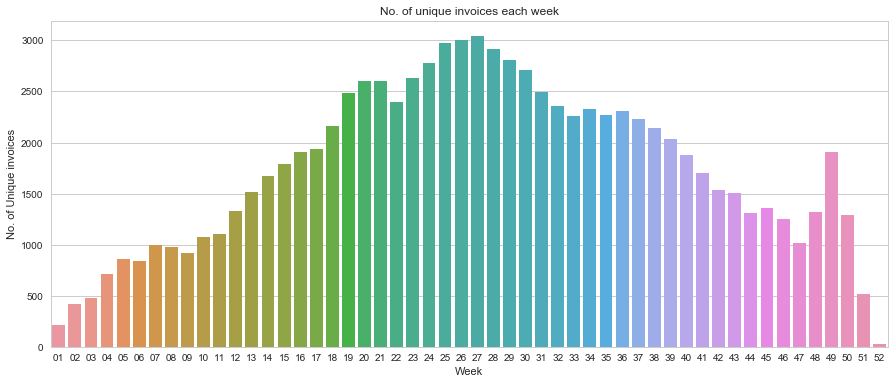

In [79]:
df1=df1.reset_index()
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
ax = sns.barplot(x="Week", y="Unique_Invoices", data=df1)
plt.ylabel("No. of Unique invoices")
plt.xlabel("Week")
plt.title("No. of unique invoices each week")
plt.xticks(rotation=0)

### Number Invoice group by day

In [94]:
df1 = df.groupby(['day','month']).agg(['count','nunique'])['InvoiceNo']

In [95]:
df1.columns=['Invoice_count','Unique_Invoices']
df1=df1.groupby(['day']).agg(['mean']).reset_index()
df1.columns = df1.columns.get_level_values(0)
df1

,day,Invoice_count,Unique_Invoices
0,01,815.454545,212.272727
1,02,972.650000,229.200000
2,03,819.684211,231.526316
3,04,657.590909,199.090909
4,05,982.714286,215.476190
5,06,1182.416667,204.750000
6,07,1074.875000,202.291667
7,08,1099.043478,214.565217
8,09,838.727273,208.000000
9,10,708.304348,196.217391


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

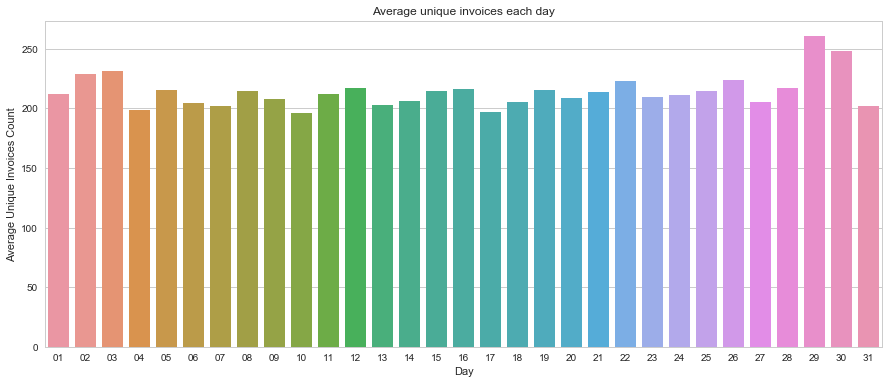

In [96]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
ax = sns.barplot(x="day", y="Unique_Invoices", data=df1)
plt.ylabel("Average Unique Invoices Count")
plt.xlabel("Day")
plt.title("Average unique invoices each day")
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

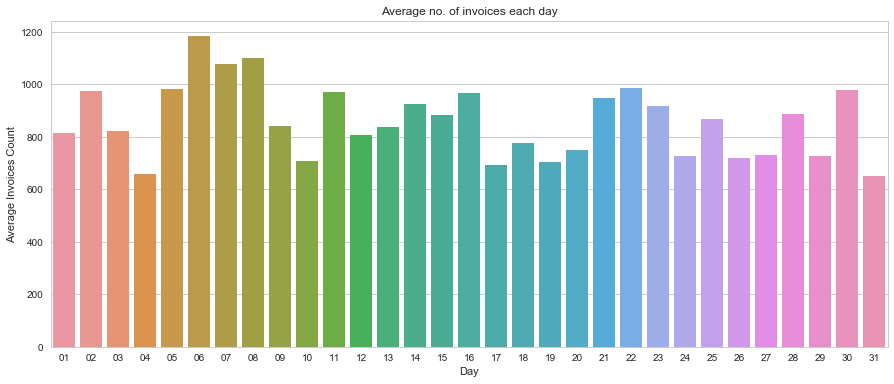

In [99]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
ax = sns.barplot(x="day", y="Invoice_count", data=df1)
plt.ylabel("Average Invoices Count")
plt.xlabel("Day")
plt.title("Average no. of invoices each day")
plt.xticks(rotation=0)

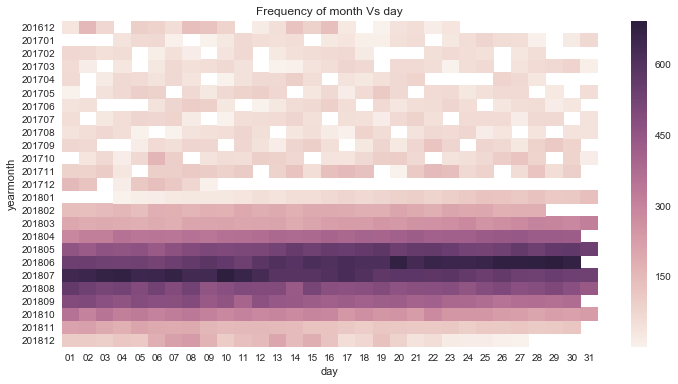

In [101]:
grouped_df  = df.groupby(["yearmonth","day"])["InvoiceNo"].unique().reset_index()
grouped_df["InvoiceNo"] = grouped_df["InvoiceNo"].apply(len)

#grouped_df = df.groupby(["Weekday", "hour"])["InvoiceNo"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('yearmonth','day', 'InvoiceNo')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of month Vs day")
plt.show()

In [ ]:
grouped_df  = df.groupby(["year","yearmon"])["InvoiceNo"].unique().reset_index()
grouped_df["InvoiceNo"] = grouped_df["InvoiceNo"].apply(len)

#grouped_df = df.groupby(["Weekday", "hour"])["InvoiceNo"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('yearmonth','day', 'InvoiceNo')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of month Vs day")
plt.show()

### Number Invoice group by Weekday
[0] ~ Sunday

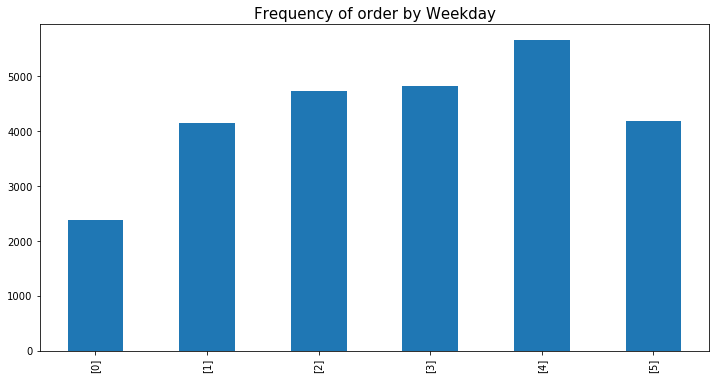

In [12]:
#[0] ~ Sunday
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Weekday", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['Weekday'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

### Number Invoice group by Hour

### Frequency of Day of week Vs Hour of day

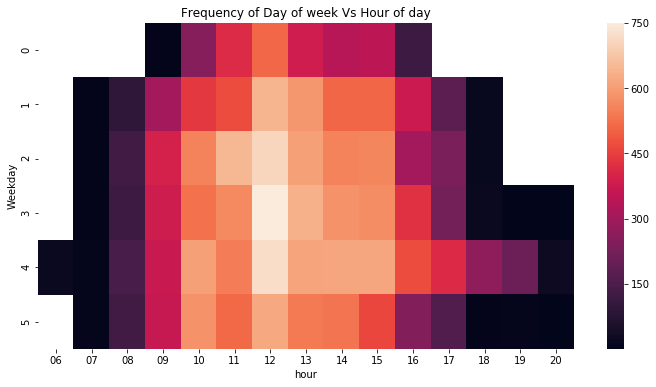

In [14]:
grouped_df  = df.groupby(["Weekday", "hour"])["InvoiceNo"].unique().reset_index()
grouped_df["InvoiceNo"] = grouped_df["InvoiceNo"].apply(len)

#grouped_df = df.groupby(["Weekday", "hour"])["InvoiceNo"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('Weekday', 'hour', 'InvoiceNo')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

## Total Sales (First order vs Reorder)

In [15]:
df = pd.read_csv('../input/data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")

#remove the negative values and replace with nan
df.loc[df['Quantity'] <= 0, 'Quantity'] = np.nan
df.loc[df['UnitPrice'] < 0, 'UnitPrice'] = np.nan

df.dropna(inplace=True)

df['total_dollars'] = df['Quantity']*df['UnitPrice']

df['yearmonth'] = df['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)
df['Week'] = df['InvoiceDate'].apply(lambda x: x.strftime('%W'))
df['day'] = df['InvoiceDate'].apply(lambda x: x.strftime('%d'))
df['Weekday'] = df['InvoiceDate'].apply(lambda x: x.strftime('%w'))
df['hour'] = df['InvoiceDate'].apply(lambda x: x.strftime('%H'))

In [16]:
#First Item Order
df_sort = df.sort_values(['CustomerID', 'StockCode', 'InvoiceDate'])
df_sort_shift1 = df_sort.shift(1)
df_sort_reorder = df_sort.copy()
df_sort_reorder['reorder'] = np.where(df_sort['StockCode'] == df_sort_shift1['StockCode'], 1,0)
df_sort_reorder.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_dollars,yearmonth,Week,day,Weekday,hour,reorder
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,201101,03,18,2,10,0
148306,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24.0,2011-04-07 10:43:00,0.25,12347,Iceland,6.0,201104,14,07,4,10,0
220583,556201,17021,NAMASTE SWAGAT INCENSE,36.0,2011-06-09 13:01:00,0.30,12347,Iceland,10.8,201106,23,09,4,13,0
148289,549222,20665,RED RETROSPOT PURSE,6.0,2011-04-07 10:43:00,2.95,12347,Iceland,17.7,201104,14,07,4,10,0
72249,542237,20719,WOODLAND CHARLOTTE BAG,10.0,2011-01-26 14:30:00,0.85,12347,Iceland,8.5,201101,04,26,3,14,0


### Top 10 Reorder Item

In [17]:
#Top 10 Reorder item
pd.DataFrame((df_sort_reorder.groupby(['Description'])['reorder'].sum())).sort_values('reorder', ascending = False).head(10)

,reorder
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1172
JUMBO BAG RED RETROSPOT,983
REGENCY CAKESTAND 3 TIER,843
LUNCH BAG RED RETROSPOT,785
POSTAGE,768
ASSORTED COLOUR BIRD ORNAMENT,730
PARTY BUNTING,689
LUNCH BAG BLACK SKULL.,647
LUNCH BAG SUKI DESIGN,621


### Sales by Month

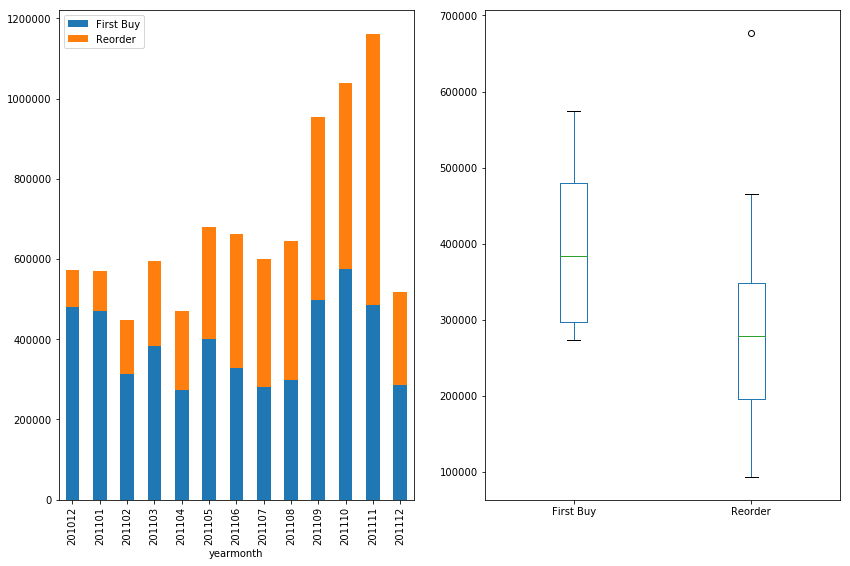

In [18]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['yearmonth'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['yearmonth'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])

### Sales by Week

In [1]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['Week'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['Week'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,12))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])

NameError: name 'df_sort_reorder' is not defined

### Sales by Day

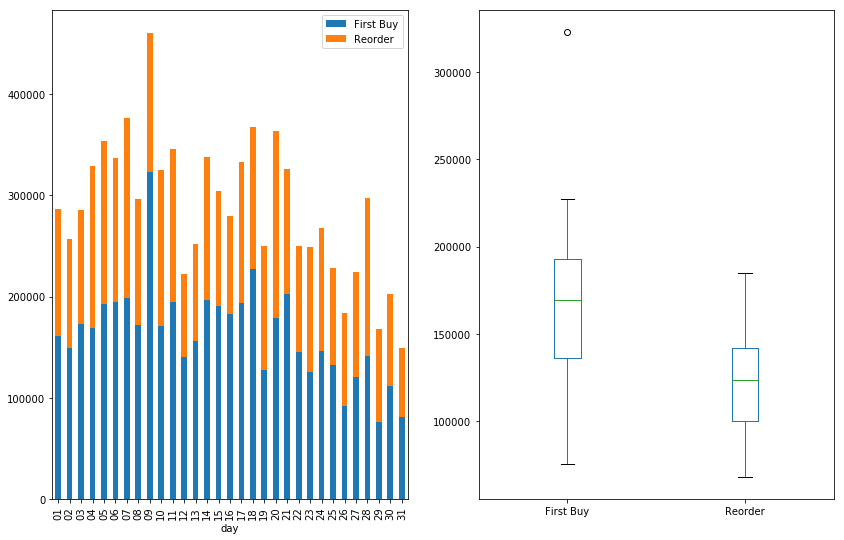

In [20]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['day'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['day'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])